In [1]:
import zipfile

fake = zipfile.ZipFile('../data/fake-news.zip', 'r')

fake.printdir()
print('\n')

File Name                                             Modified             Size
fake.csv                                       2019-09-20 02:14:32     56680002




In [2]:
import io
import pandas as p

fake_csv = io.TextIOWrapper(fake.open('fake.csv'))
fake_df = p.read_csv(fake_csv)

In [3]:
print('Columns\nFake:')
print(fake_df.columns)

Columns
Fake:
Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')


In [4]:
import numpy as np

fake_df = fake_df.drop('main_img_url', axis = 1)
fake_df.domain_rank = fake_df.domain_rank.fillna(np.average(fake_df.domain_rank.dropna()))
fake_df.author = fake_df.author.fillna('')
fake_df.title = fake_df.title.fillna('')
fake_df.thread_title = fake_df.thread_title.fillna('')
fake_df.country = fake_df.country.fillna('')
fake_df.text = fake_df.text.fillna('')

bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: type, dtype: int64


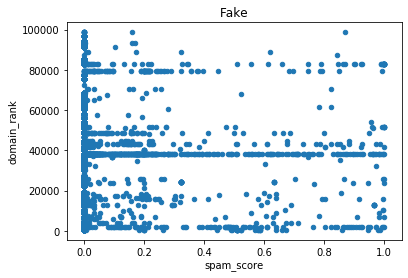

In [6]:
fake_df.plot(x='spam_score', y='domain_rank', kind='scatter', title='Fake')
print(fake_df.type.value_counts())

Text(0.5, 0.98, 'Fake')

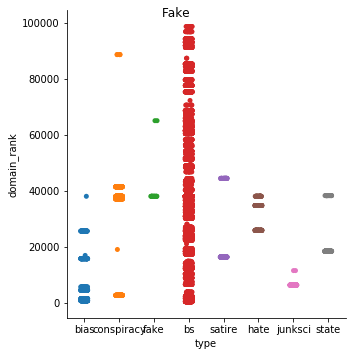

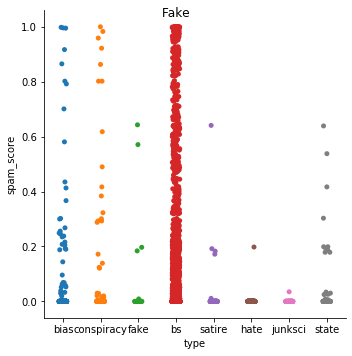

In [7]:
import seaborn as sns

sns.catplot(x="type", y="domain_rank", data=fake_df).fig.suptitle('Fake')
sns.catplot(x="type", y="spam_score", data=fake_df).fig.suptitle('Fake')